# Cancelamento de Clientes - Telco (dataset criado pela IBM para demonstração da ferramenta IBM Cognos Analytics)

### Contém informações sobre uma empresa fictícia de telecomunicações que forneceu serviços de telefonia residencial e internet para 7043 clientes na Califórnia no 3º trimestre.

### Etapa de feature engineering - Realizado por Sabrina Otoni da Silva - 2024/01

### Objetivo: Aplicar técnicas de Feature Engineering no DataFrame.

Nessa etapa, estarei apenas aplicando transformações nos dados com o objetivo de treinar os modelos, sem fazer hipóteses sob os dados, se servirão ou não. A etapa de feature selection estarei deixando para fazer no treinamento de cada modelo, pois isso é muito particular de cada um.

In [1]:
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

import sys
import os

automations_dir = os.path.join(os.getcwd(), '../automations')

if automations_dir not in sys.path:
    sys.path.append(automations_dir)

import data_processing as processing

In [2]:
datapath = Path('../data')
csv_path = Path(f'{datapath}/d02_intermediate/X_train.csv')

In [3]:
data = pd.read_csv(f'{csv_path}')
data.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Stockton,37.954089,-121.329761,Male,No,No,No,57,Yes,No,...,No,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.35,4317.35
1,Grover Beach,35.120833,-120.618430,Male,No,Yes,Yes,1,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75
2,Big Bar,40.775272,-123.287414,Female,No,No,No,54,Yes,No,...,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),100.05,5299.65
3,Laguna Beach,33.570023,-117.773669,Male,Yes,Yes,No,44,Yes,Yes,...,Yes,No,No,No,Yes,One year,No,Mailed check,88.40,3912.90
4,Fullerton,33.877639,-117.961212,Female,Yes,Yes,No,72,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),89.55,6448.85


In [4]:
data['ID'] = range(1, len(data) + 1)

Criando uma coluna de ID para conseguir fazer merge depois da aplicação do KMeans.

In [5]:
X = data.loc[:,['ID','Latitude','Longitude']]

In [6]:
kmeans = [KMeans(n_clusters=i) for i in range(1,10)]
X_axis = data[['Longitude']]
Y_axis = data[['Latitude']]

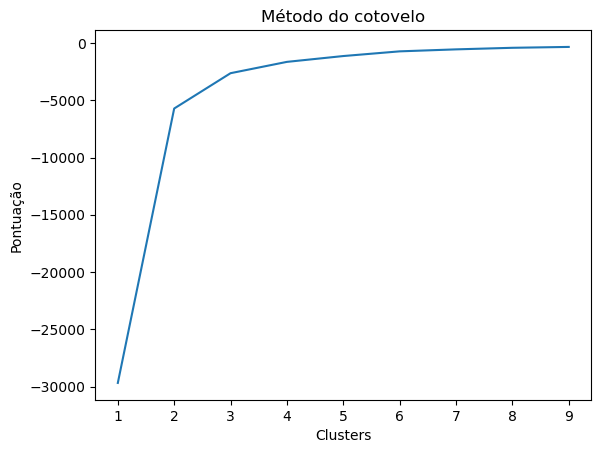

In [7]:
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(range(1,10), score)
plt.xlabel('Clusters')
plt.ylabel('Pontuação')
plt.title('Método do cotovelo')
plt.show()

Visualizando um número bom de clusters para inicialização do KMeans através do método do cotovelo. Nesse caso, estarei inicializando com 3 clusters.

In [8]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X.iloc[:, 1:3])
centers = kmeans.cluster_centers_
labels = kmeans.predict(X.iloc[:, 1:3])

Armazenando os centróides e os resultados obtidos após o treinamento e a predição do KMeans aplicado aos dados de Latitude e Longitude.

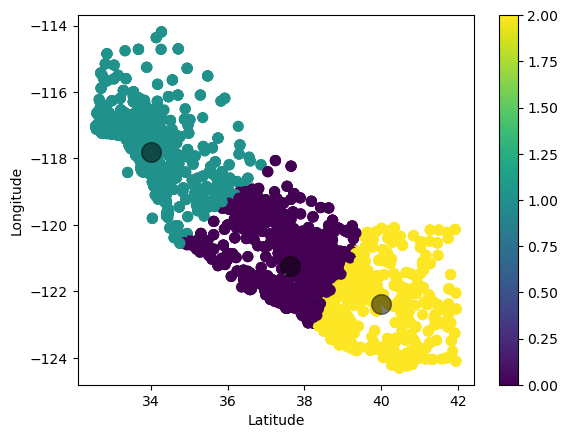

In [9]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Plotando os centróides no mapa e separando por cor cada cluster.

In [10]:
silhouette_scores = []

for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters = n_clusters, init ='k-means++')
    cluster_labels = kmeans.fit_predict(X)

    silhouette = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette)

    print(f"Para n_clusters = {n_clusters}, a média do coeficiente de silhueta é: {silhouette}")

Para n_clusters = 2, a média do coeficiente de silhueta é: 0.6265613632178549
Para n_clusters = 3, a média do coeficiente de silhueta é: 0.5899135818836767
Para n_clusters = 4, a média do coeficiente de silhueta é: 0.5714966824230574
Para n_clusters = 5, a média do coeficiente de silhueta é: 0.5603552966102098
Para n_clusters = 6, a média do coeficiente de silhueta é: 0.5529763414853148
Para n_clusters = 7, a média do coeficiente de silhueta é: 0.5471787109032664
Para n_clusters = 8, a média do coeficiente de silhueta é: 0.5431230557214323
Para n_clusters = 9, a média do coeficiente de silhueta é: 0.5398889277203579


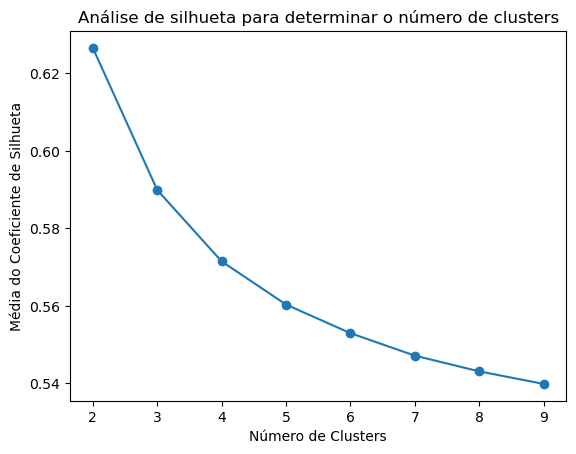

In [11]:
plt.plot(range(2,10), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Média do Coeficiente de Silhueta')
plt.title('Análise de silhueta para determinar o número de clusters')
plt.show()

A análise de silhueta indica que 2 clusters obteriam uma melhor variação... continue explicando aqui!!!!!!!!!!!!!!!!!!!!!!!!!

In [12]:
kmeans = processing.KMeansCluster(n_clusters=3, columns_cluster= ['Latitude', 'Longitude'])
kmeans.fit(data)

KMeansCluster(columns_cluster=['Latitude', 'Longitude'],
              model_path='..\\preprocessing/kmeans_model.pkl')

In [13]:
X = kmeans.transform(data)

In [14]:
X['Cluster'].value_counts()

1    2304
2    1822
0     804
Name: Cluster, dtype: int64

In [15]:
X = X[['ID','Cluster']]

In [16]:
data = data.merge(X, left_on='ID', right_on='ID')
data.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,ID,Cluster
0,Stockton,37.954089,-121.329761,Male,No,No,No,57,Yes,No,...,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.35,4317.35,1,2
1,Grover Beach,35.120833,-120.618430,Male,No,Yes,Yes,1,Yes,No,...,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75,2,2
2,Big Bar,40.775272,-123.287414,Female,No,No,No,54,Yes,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),100.05,5299.65,3,0
3,Laguna Beach,33.570023,-117.773669,Male,Yes,Yes,No,44,Yes,Yes,...,No,No,Yes,One year,No,Mailed check,88.40,3912.90,4,1
4,Fullerton,33.877639,-117.961212,Female,Yes,Yes,No,72,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),89.55,6448.85,5,1


In [17]:
unique_values= {col: data[col].unique() for col in data.columns}
for col, values in unique_values.items():
    print(f'Valores na coluna "{col}": {values}')
    print('--------------------------------------')

Valores na coluna "City": ['Stockton' 'Grover Beach' 'Big Bar' ... 'Quincy' 'Burney' 'Whitethorn']
--------------------------------------
Valores na coluna "Latitude": [37.954089 35.120833 40.775272 ... 34.11572  40.946785 40.053159]
--------------------------------------
Valores na coluna "Longitude": [-121.329761 -120.61843  -123.287414 ... -118.192754 -121.719489
 -123.995867]
--------------------------------------
Valores na coluna "Gender": ['Male' 'Female']
--------------------------------------
Valores na coluna "Senior Citizen": ['No' 'Yes']
--------------------------------------
Valores na coluna "Partner": ['No' 'Yes']
--------------------------------------
Valores na coluna "Dependents": ['No' 'Yes']
--------------------------------------
Valores na coluna "Tenure Months": [57  1 54 44 72  3 31 22 23 11 30  5 60 20 53 27 62 35 12 17 24  9 66 36
 10 71 37 34 50  8 47 40  4 15 41 28 59 13 45 58 49  2 48 42 64 63 65 68
 69 21 70 29  7 55 39 18 46 32 43 52 33 16 61 14 38 67 56 2

In [18]:
pipeline_ohe = Pipeline([
    ('kmeans_cluster', processing.KMeansCluster(model_path='../preprocessing/kmeans_model.pkl', columns_cluster=['Latitude', 'Longitude'])),
    ('import_drop', processing.DropColumns(drop_columns=["City", "Latitude", "Longitude", "ID"])),
    ('service_transformer', processing.ServiceTransformer(["Multiple Lines", "Online Security", "Online Backup", "Device Protection", "Tech Support",
                                                     "Streaming TV", "Streaming Movies"])),
    ('categorical_encoder', processing.CategoricalEncoder(encoder_type='onehot', specified_columns=["Gender", "Senior Citizen", "Partner", "Dependents",
                                                                                                    "Phone Service", "Multiple Lines", "Internet Service",
                                                                                                    "Online Security", "Online Backup", "Device Protection",
                                                                                                    "Tech Support", "Streaming TV", "Streaming Movies", 
                                                                                                    "Contract", "Paperless Billing", "Payment Method",
                                                                                                    "Cluster"]))
])

In [19]:
data_ohe = pipeline_ohe.fit_transform(data)
data_ohe.head()

,Tenure Months,Monthly Charges,Total Charges,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Fiber optic,...,Streaming TV_Yes,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Cluster_1,Cluster_2
0,57,74.35,4317.35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,19.75,19.75,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,54,100.05,5299.65,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,44,88.40,3912.90,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,72,89.55,6448.85,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [20]:
unique_values= {col: data_ohe[col].unique() for col in data_ohe.columns}
for col, values in unique_values.items():
    print(f'Valores na coluna "{col}": {values}')
    print('--------------------------------------')

Valores na coluna "Tenure Months": [57  1 54 44 72  3 31 22 23 11 30  5 60 20 53 27 62 35 12 17 24  9 66 36
 10 71 37 34 50  8 47 40  4 15 41 28 59 13 45 58 49  2 48 42 64 63 65 68
 69 21 70 29  7 55 39 18 46 32 43 52 33 16 61 14 38 67 56 25 19  6 26 51
  0]
--------------------------------------
Valores na coluna "Monthly Charges": [ 74.35  19.75 100.05 ... 102.4   71.75  66.35]
--------------------------------------
Valores na coluna "Total Charges": [4317.35   19.75 5299.65 ... 4250.1  8075.35 1929.95]
--------------------------------------
Valores na coluna "Gender_Male": [1. 0.]
--------------------------------------
Valores na coluna "Senior Citizen_Yes": [0. 1.]
--------------------------------------
Valores na coluna "Partner_Yes": [0. 1.]
--------------------------------------
Valores na coluna "Dependents_Yes": [0. 1.]
--------------------------------------
Valores na coluna "Phone Service_Yes": [1. 0.]
--------------------------------------
Valores na coluna "Multiple Lines_

In [21]:
pipeline_le = Pipeline([
    ('kmeans_cluster', processing.KMeansCluster(model_path='../preprocessing/kmeans_model.pkl', columns_cluster=['Latitude', 'Longitude'])),
    ('import_drop', processing.DropColumns(drop_columns=['City', 'Latitude', 'Longitude', 'ID'])),
    ('categorical_encoder', processing.CategoricalEncoder(encoder_type='label'))
])

In [22]:
data_le = pipeline_le.fit_transform(data)
data_le.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Cluster
0,1,0,0,0,57,1,0,0,2,0,2,0,2,2,2,1,0,74.35,4317.35,2
1,1,0,1,1,1,1,0,2,1,1,1,1,1,1,0,0,2,19.75,19.75,2
2,0,0,0,0,54,1,0,1,2,2,0,0,2,2,1,1,1,100.05,5299.65,0
3,1,1,1,0,44,1,2,1,0,2,0,0,0,2,1,0,3,88.40,3912.90,1
4,0,1,1,0,72,1,2,0,2,2,2,2,2,2,2,1,1,89.55,6448.85,1


In [23]:
unique_values= {col: data_le[col].unique() for col in data_le.columns}
for col, values in unique_values.items():
    print(f'Valores na coluna "{col}": {values}')
    print('--------------------------------------')

Valores na coluna "Gender": [1 0]
--------------------------------------
Valores na coluna "Senior Citizen": [0 1]
--------------------------------------
Valores na coluna "Partner": [0 1]
--------------------------------------
Valores na coluna "Dependents": [0 1]
--------------------------------------
Valores na coluna "Tenure Months": [57  1 54 44 72  3 31 22 23 11 30  5 60 20 53 27 62 35 12 17 24  9 66 36
 10 71 37 34 50  8 47 40  4 15 41 28 59 13 45 58 49  2 48 42 64 63 65 68
 69 21 70 29  7 55 39 18 46 32 43 52 33 16 61 14 38 67 56 25 19  6 26 51
  0]
--------------------------------------
Valores na coluna "Phone Service": [1 0]
--------------------------------------
Valores na coluna "Multiple Lines": [0 2 1]
--------------------------------------
Valores na coluna "Internet Service": [0 2 1]
--------------------------------------
Valores na coluna "Online Security": [2 1 0]
--------------------------------------
Valores na coluna "Online Backup": [0 1 2]
----------------------

In [24]:
log_transformer = processing.LogTransformer(columns=['Total Charges'])
log_transformer.fit(data)

LogTransformer(columns=['Total Charges'])

In [25]:
pipeline_log = Pipeline([
    ('log_transformation', processing.LogTransformer(model_path='../preprocessing/log_transformer_model.pkl', columns=['Total Charges']))
])

In [26]:
data_log = pipeline_log.fit_transform(data)
data_log.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,ID,Cluster
0,Stockton,37.954089,-121.329761,Male,No,No,No,57,Yes,No,...,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.35,8.370629,1,2
1,Grover Beach,35.120833,-120.618430,Male,No,Yes,Yes,1,Yes,No,...,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,3.032546,2,2
2,Big Bar,40.775272,-123.287414,Female,No,No,No,54,Yes,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),100.05,8.575585,3,0
3,Laguna Beach,33.570023,-117.773669,Male,Yes,Yes,No,44,Yes,Yes,...,No,No,Yes,One year,No,Mailed check,88.40,8.272290,4,1
4,Fullerton,33.877639,-117.961212,Female,Yes,Yes,No,72,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),89.55,8.771812,5,1


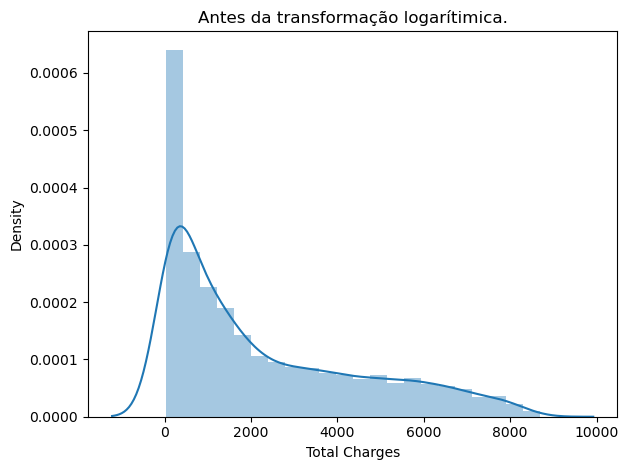

In [27]:
sns.distplot(data['Total Charges'])
plt.title('Antes da transformação logarítimica.')
plt.tight_layout()
plt.show()

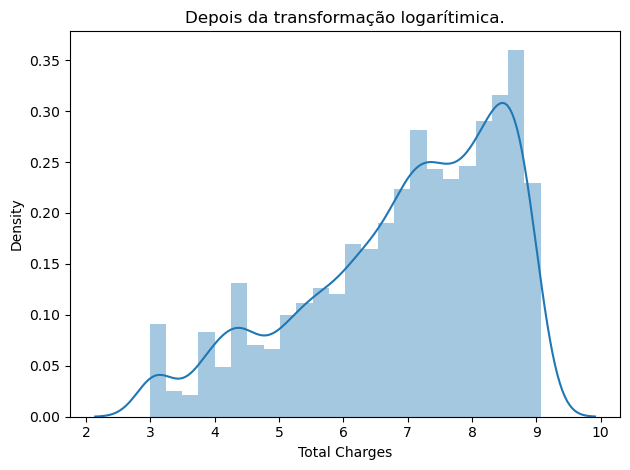

In [28]:
sns.distplot(data_log['Total Charges'])
plt.title('Depois da transformação logarítimica.')
plt.tight_layout()
plt.show()

In [29]:
boxcox_transformer = processing.BoxCoxTransformer(columns=['Total Charges'])
boxcox_transformer.fit(data)

BoxCoxTransformer(columns=['Total Charges'],
                  model_path='..\\preprocessing/boxcox_transformer_model.pkl')

In [30]:
pipeline_boxcox = Pipeline([
    ('boxcox_transformation', processing.BoxCoxTransformer(model_path='../preprocessing/boxcox_transformer_model.pkl', columns=['Total Charges']))
])

In [31]:
data_bx = pipeline_boxcox.fit_transform(data)
data_bx.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,ID,Cluster
0,Stockton,37.954089,-121.329761,Male,No,No,No,57,Yes,No,...,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.35,29.535808,1,2
1,Grover Beach,35.120833,-120.618430,Male,No,Yes,Yes,1,Yes,No,...,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,4.483993,2,2
2,Big Bar,40.775272,-123.287414,Female,No,No,No,54,Yes,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),100.05,31.343446,3,0
3,Laguna Beach,33.570023,-117.773669,Male,Yes,Yes,No,44,Yes,Yes,...,No,No,Yes,One year,No,Mailed check,88.40,28.701685,4,1
4,Fullerton,33.877639,-117.961212,Female,Yes,Yes,No,72,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),89.55,33.165552,5,1


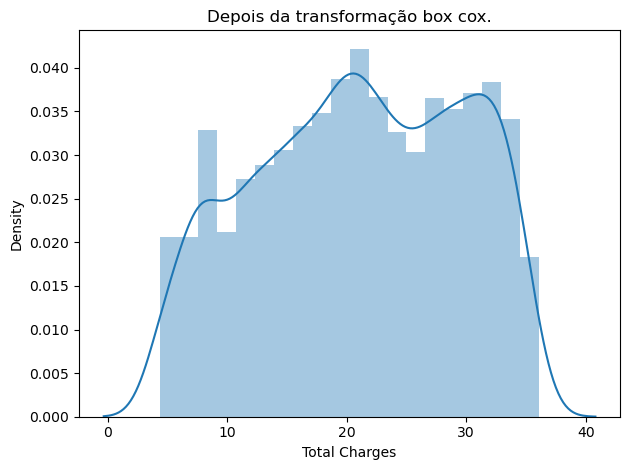

In [32]:
sns.distplot(data_bx['Total Charges'])
plt.title('Depois da transformação box cox.')
plt.tight_layout()
plt.show()

In [33]:
rbf_transformer = processing.RBFTransformer(column='Tenure Months', n_modes=2, gamma=0.1)
rbf_transformer.fit(data)

RBFTransformer(column='Tenure Months',
               model_path='..\\preprocessing/rbf_transformer_model.pkl')

In [34]:
pipeline_rbf = Pipeline([
    ('rbf_transformer', processing.RBFTransformer(column='Tenure Months', model_path='../preprocessing/rbf_transformer_model.pkl'))
])

In [35]:
data_rbf = pipeline_rbf.fit_transform(data)
data_rbf.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,ID,Cluster,Tenure Months_mode_0,Tenure Months_mode_1
0,Stockton,37.954089,-121.329761,Male,No,No,No,57,Yes,No,...,Yes,Two year,Yes,Bank transfer (automatic),74.35,4317.35,1,2,1.691898e-10,1.691898e-10
1,Grover Beach,35.120833,-120.618430,Male,No,Yes,Yes,1,Yes,No,...,No internet service,Month-to-month,No,Electronic check,19.75,19.75,2,2,1.180733e-219,1.180733e-219
2,Big Bar,40.775272,-123.287414,Female,No,No,No,54,Yes,No,...,Yes,One year,Yes,Credit card (automatic),100.05,5299.65,3,0,8.489044e-15,8.489044e-15
3,Laguna Beach,33.570023,-117.773669,Male,Yes,Yes,No,44,Yes,Yes,...,Yes,One year,No,Mailed check,88.40,3912.90,4,1,8.939487e-35,8.939487e-35
4,Fullerton,33.877639,-117.961212,Female,Yes,Yes,No,72,Yes,Yes,...,Yes,Two year,Yes,Credit card (automatic),89.55,6448.85,5,1,1.000000e+00,1.000000e+00
